In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from differential_evolution import differential_evolution

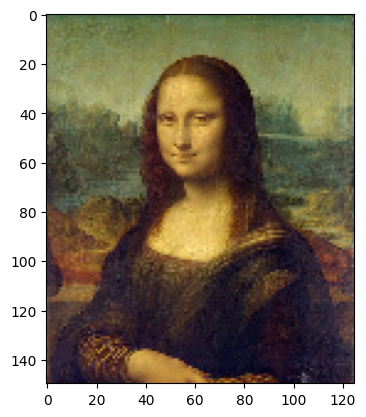

In [14]:
target = cv2.imread('../images/m2.jpg')
target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)
target = cv2.resize(target, (0,0), fx=0.2, fy=0.2)
plt.imshow(target)

Iteration:  600 Best fitness:  1404957 Best individual:  [127.32240342 104.90027345   3.85771102  26.95817128  46.94748476
 168.13445829   0.22964121]


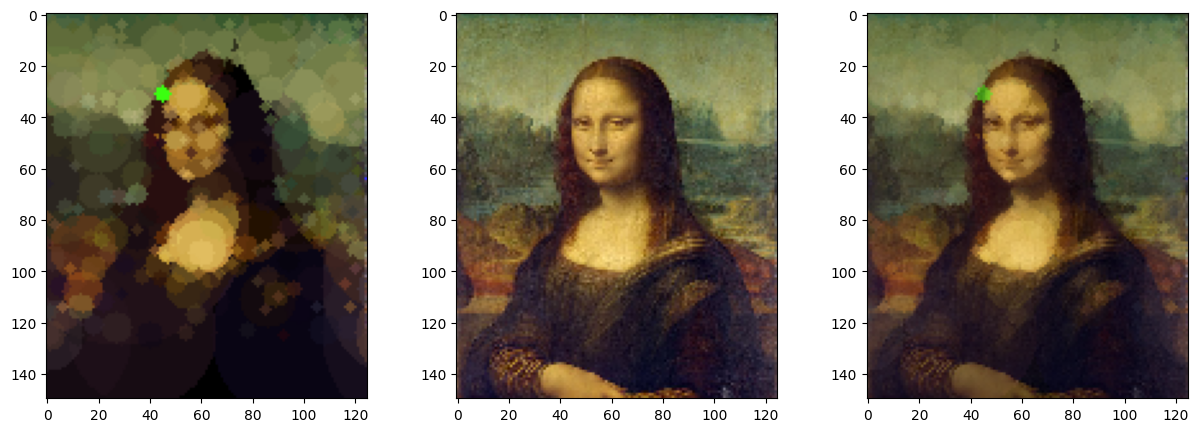

In [15]:
from turtle import clear
from IPython.display import clear_output

def ae(img = np.array([]), target = np.array([])):
    return np.sum(np.abs(target - img))

def obj_fung(ind = np.array([]), img = np.array([]), target = np.array([]), return_image=False):
    x, y, r, R, G, B, A = ind

    x, y, r = int(x), int(y), int(r)
    R, G, B = int(R), int(G), int(B)

    overlay = img.copy()
    cv2.circle(overlay, (x, y), r, (R, G, B), -1)  
    image_new = cv2.addWeighted(overlay, A, img, 1 - A, 0)

    return ae(image_new, target) if not return_image else (ae(image_new, target), image_new)

test_f, test_img = obj_fung(np.array([100, 100, 50, 0, 0, 0, 0.5]), np.zeros_like(target, dtype=np.int8), target, return_image = True)

img = np.zeros_like(target)
w, h = target.shape[:2]

bounds = [(0, w), (0, h), (2, w//3), (0, 255), (0, 255), (0, 255), (0.2, 1.0)]
NUM_CIRCLES = 600

for i in range(NUM_CIRCLES):
    solver = differential_evolution(obj_fung, bounds, args=(img.copy(), target.copy(), False), population_size = 50, max_iters = 250, Cr = 0.9)
    best, _ = solver.solve(verbose = False)
    fitness, img_circle = obj_fung(best, img, target, return_image = True)
    if fitness < ae(img, target):
        img = img_circle
    clear_output(wait=True)
    print("Iteration: ", i+1, "Best fitness: ", fitness, "Best individual: ", best)
    fig, ax = plt.subplots(1, 3, figsize = (15, 5))
    ax[0].imshow(img)
    ax[1].imshow(target)
    combination = cv2.addWeighted(img, 0.5, target, 0.5, 0)
    ax[2].imshow(combination)
    plt.show()

Iteration:  500 Best fitness:  1335885 Best individual:  [150.          82.07534107   2.15111357  70.50228062 102.7477891
 217.80033409   0.67480536]


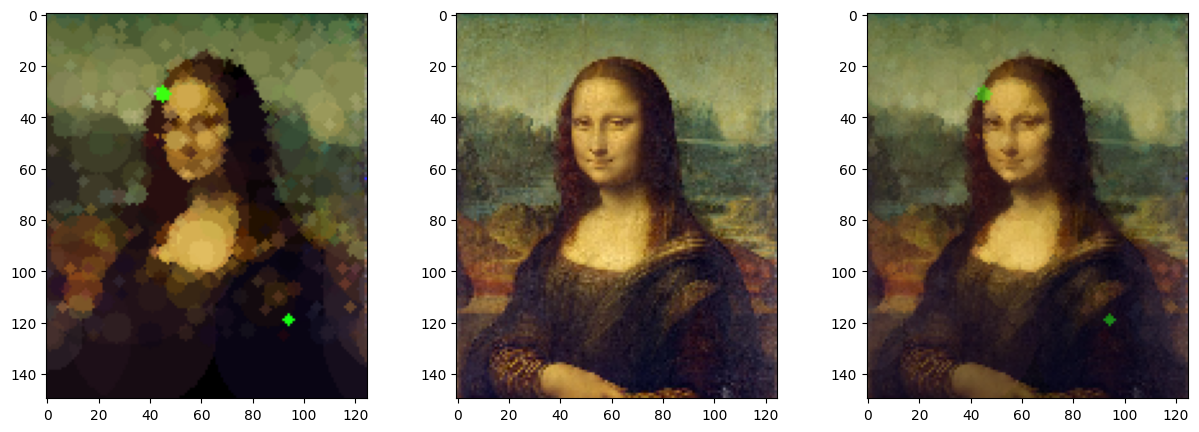

In [16]:
bounds = [(0, w), (0, h), (2, w//3), (0, 255), (0, 255), (0, 255), (0.2, 1.0)]
NUM_CIRCLES = 500

for i in range(NUM_CIRCLES):
    solver = differential_evolution(obj_fung, bounds, args=(img.copy(), target.copy(), False), population_size = 50, max_iters = 200, Cr = 0.9)
    best, _ = solver.solve(verbose = False)
    fitness, img_circle = obj_fung(best, img, target, return_image = True)
    if fitness < ae(img, target):
        img = img_circle
    clear_output(wait=True)
    print("Iteration: ", i+1, "Best fitness: ", fitness, "Best individual: ", best)
    fig, ax = plt.subplots(1, 3, figsize = (15, 5))
    ax[0].imshow(img)
    ax[1].imshow(target)
    combination = cv2.addWeighted(img, 0.5, target, 0.5, 0)
    ax[2].imshow(combination)
    plt.show()